# WANG-ZHANG-MA-LI’S SCHEME

In [19]:
# imports
from PIL import Image
import numpy as np
import random
import sys
import os
import shutil
import matplotlib.pyplot as plt

In [11]:
# Clear the shares directory
def remove_shares():
  if os.path.exists('shares'):
    shutil.rmtree('shares')
  os.makedirs('shares')

In [6]:
# Importing image
img_name = 'lena.png'

img = Image.open(img_name)
img = img.convert('RGB')
img = np.array(img)

# Get the dimensions of the image
width, height, channels = img.shape

print("Image shape: ", img.shape)

Image shape:  (220, 220, 3)


## Generating Random Matrices

In [7]:
# Generating n-1 random matrices of the same size as the image
N = 10
random_matrices = []

for i in range(N-1):
    random_matrix = np.random.randint(0, 256, (width, height, channels))
    random_matrices.append(random_matrix)


## Generating Share Images

In [12]:
# Generating the shares
shares = [None] * N

shares[0] = random_matrices[0]

for i in range(1, N-1):
    shares[i] = np.bitwise_xor(random_matrices[i], random_matrices[i-1])
    
shares[N-1] = np.bitwise_xor(img, random_matrices[N-2])

# Saving the shares after clearing existing shares
remove_shares()
for i in range(N):
    share = Image.fromarray(shares[i].astype(np.uint8))
    share.save(f"shares/share_{i+1}.png")
    
print("Shares saved successfully!")

Shares saved successfully!


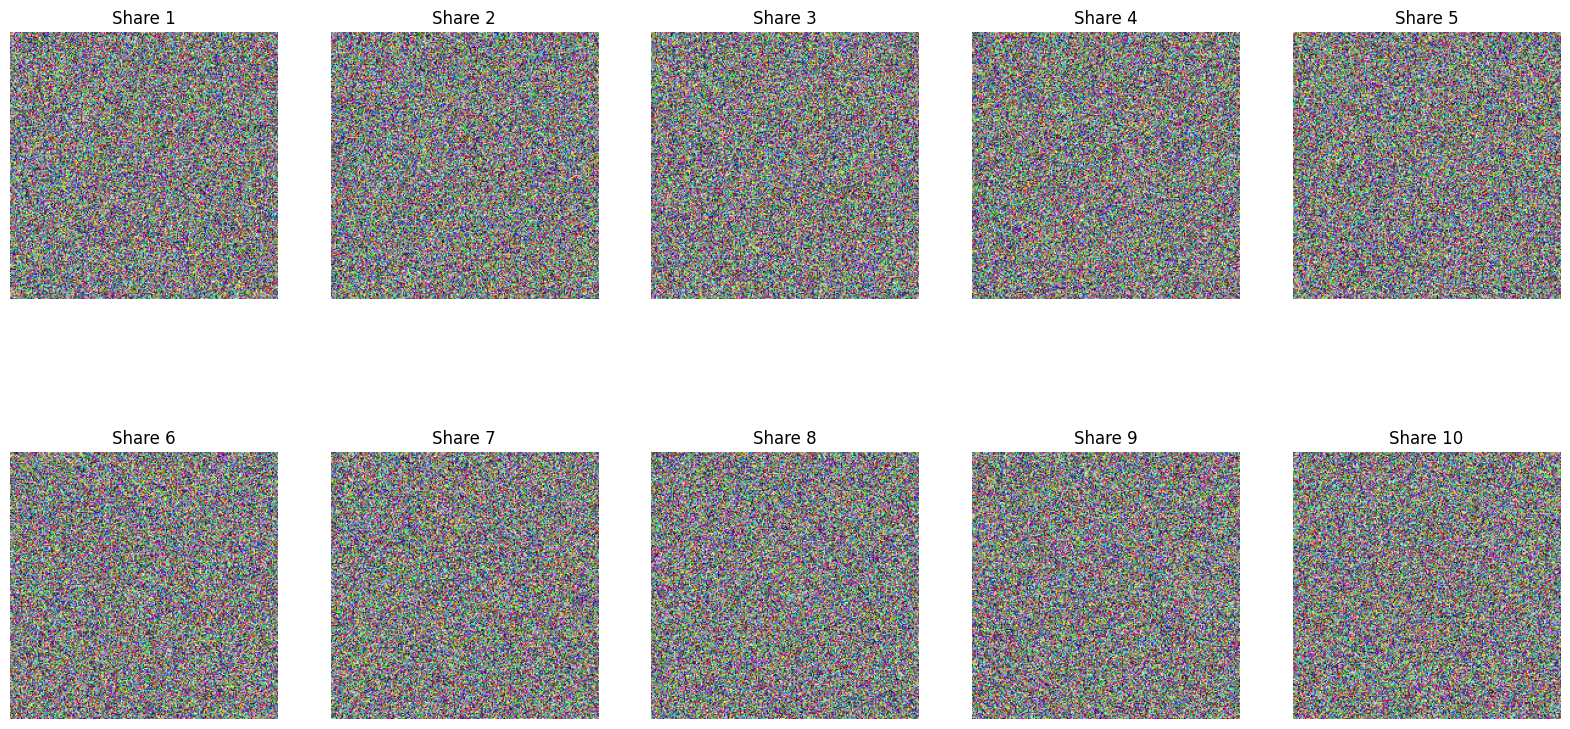

In [20]:
# Displaying the shares here as plt
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(N):
    axs[i//5, i%5].imshow(shares[i])
    axs[i//5, i%5].axis('off')
    axs[i//5, i%5].set_title(f"Share {i+1}")
plt.show()


## Reconstructing the Secret Image

Secret Image can be reconstructed by performing xor operation on the share images.

In [22]:
# Combining the shares
reconstructed_image = np.zeros((width, height, channels))
reconstructed_image = reconstructed_image.astype(int)
for i in range(N):
    reconstructed_image = np.bitwise_xor(reconstructed_image, shares[i])

# Saving the reconstructed image
reconstructed_image = Image.fromarray(reconstructed_image.astype(np.uint8))
reconstructed_image.save("reconstructed_image.png")

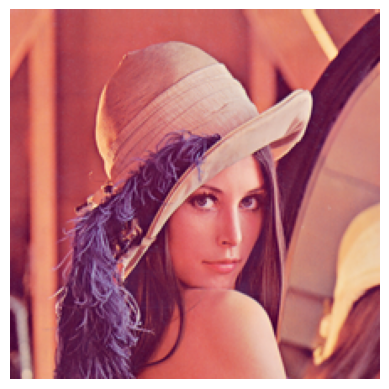

In [25]:
plt.axis('off')
plt.imshow(reconstructed_image)

In [30]:
# Accuracy
reconstructed_image = np.array(reconstructed_image)
accuracy = np.mean(img == reconstructed_image) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


The recovery is lossless. The original image can be recovered exactly.